In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/newbodrumdaten/mycsvfile9.csv
/kaggle/input/newbodrumdaten/mycsvfile10.csv


In [2]:
import pandas as pd
import geopandas
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from folium import Choropleth
from folium.plugins import HeatMap
import datetime
from scipy.stats import norm,skew
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [3]:
data2=pd.read_csv("/kaggle/input/newbodrumdaten/mycsvfile9.csv")

In [4]:
data2 = data2.drop(['Region', 'Unnamed: 0'], axis=1)

In [5]:
data2 = data2.rename(columns={'new2': 'FloatedData'})

In [6]:
data2 = data2.drop(data2[data2['Depth(km)'] == 0.0].index)

In [7]:
data2.shape

(21410, 8)

In [8]:
data2.head()

Date         Time  Latitude  Longitude  Depth(km)  Magnitude  \
0  7/20/2017  03:28:22.81   37.5327    27.4825        5.4        1.8   
6  7/20/2017  22:10:00.82   36.9637    27.4223        5.4        2.6   
7  7/20/2017  22:31:09.66   36.9693    27.4057        7.1        6.6   
8  7/20/2017  22:34:15.33   36.9298    27.6018        5.5        3.7   
9  7/20/2017  22:34:40.17   36.9663    27.4163        5.4        3.7   

   Distance(km)  FloatedData  
0         63.98  2017.547945  
6          2.03  2017.547945  
7          1.15  2017.547945  
8         18.29  2017.547945  
9          1.61  2017.547945

In [9]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21410 entries, 0 to 24779
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          21410 non-null  object 
 1   Time          21410 non-null  object 
 2   Latitude      21410 non-null  float64
 3   Longitude     21410 non-null  float64
 4   Depth(km)     21410 non-null  float64
 5   Magnitude     21410 non-null  float64
 6   Distance(km)  21410 non-null  float64
 7   FloatedData   21410 non-null  float64
dtypes: float64(6), object(2)
memory usage: 1.5+ MB


In [10]:
data2['Date2']= pd.to_datetime(data2["Date"])

In [11]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21410 entries, 0 to 24779
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          21410 non-null  object        
 1   Time          21410 non-null  object        
 2   Latitude      21410 non-null  float64       
 3   Longitude     21410 non-null  float64       
 4   Depth(km)     21410 non-null  float64       
 5   Magnitude     21410 non-null  float64       
 6   Distance(km)  21410 non-null  float64       
 7   FloatedData   21410 non-null  float64       
 8   Date2         21410 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 1.6+ MB


In [12]:
data = data2
data.head()

Date         Time  Latitude  Longitude  Depth(km)  Magnitude  \
0  7/20/2017  03:28:22.81   37.5327    27.4825        5.4        1.8   
6  7/20/2017  22:10:00.82   36.9637    27.4223        5.4        2.6   
7  7/20/2017  22:31:09.66   36.9693    27.4057        7.1        6.6   
8  7/20/2017  22:34:15.33   36.9298    27.6018        5.5        3.7   
9  7/20/2017  22:34:40.17   36.9663    27.4163        5.4        3.7   

   Distance(km)  FloatedData      Date2  
0         63.98  2017.547945 2017-07-20  
6          2.03  2017.547945 2017-07-20  
7          1.15  2017.547945 2017-07-20  
8         18.29  2017.547945 2017-07-20  
9          1.61  2017.547945 2017-07-20

In [13]:
data.isnull().any()

Date            False
Time            False
Latitude        False
Longitude       False
Depth(km)       False
Magnitude       False
Distance(km)    False
FloatedData     False
Date2           False
dtype: bool

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21410 entries, 0 to 24779
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          21410 non-null  object        
 1   Time          21410 non-null  object        
 2   Latitude      21410 non-null  float64       
 3   Longitude     21410 non-null  float64       
 4   Depth(km)     21410 non-null  float64       
 5   Magnitude     21410 non-null  float64       
 6   Distance(km)  21410 non-null  float64       
 7   FloatedData   21410 non-null  float64       
 8   Date2         21410 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 1.6+ MB


**Data Analizi**

Text(0.5, 0, 'Date')

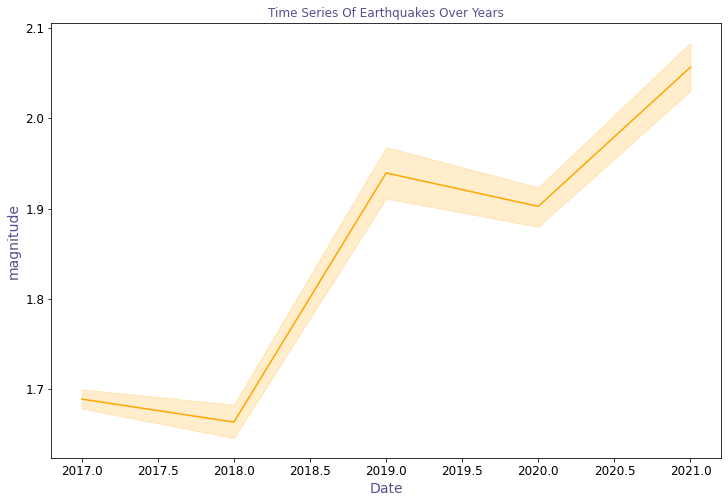

In [15]:
#plotting a lineplot with magnitudes with respectto dates
plt.figure(figsize=(12,8))
Time_series=sns.lineplot(x=data2['Date2'].dt.year,y="Magnitude",data=data2, color="#ffa600")
Time_series.set_title("Time Series Of Earthquakes Over Years", color="#58508d")
Time_series.set_ylabel("magnitude", color="#58508d")
Time_series.set_xlabel("Date", color="#58508d")

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


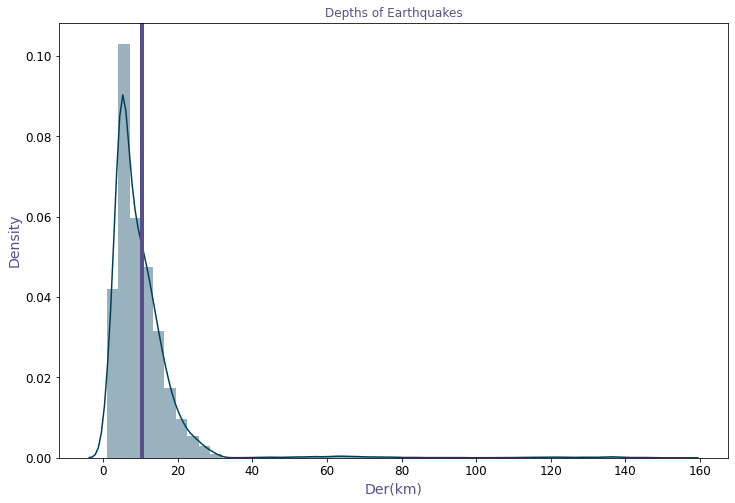

In [16]:
#Plotting the depth of earthquake and mean depth

plt.figure(figsize=(12,8))
depth = data2["Depth(km)"].values
mean_D= data2["Depth(km)"].mean()
Depth_plot = sns.distplot(depth, color ="#003f5c")
Depth_plot.set_title("Depths of Earthquakes", color="#58508d")
Depth_plot.set_ylabel("Density", color="#58508d")
Depth_plot.set_xlabel("Der(km)", color="#58508d")

plt.axvline(mean_D,0,1, color="#58508d",linewidth=4,label="Mean")

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


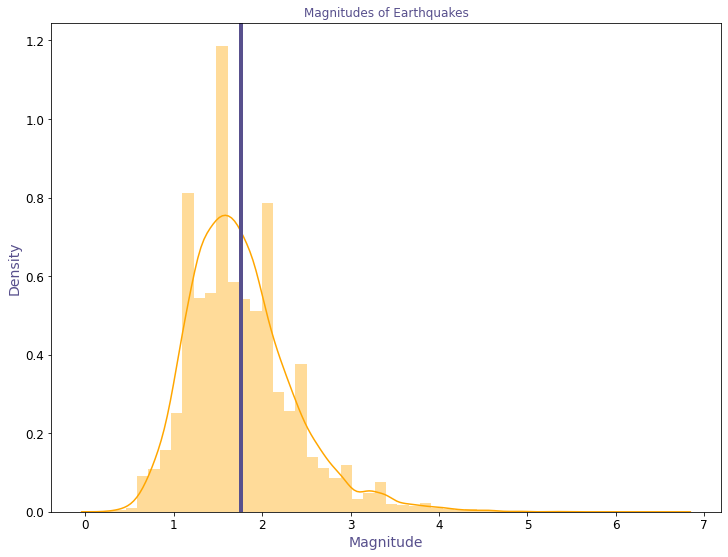

In [17]:
plt.figure(figsize=(12,9))
strength = data2["Magnitude"].values
mean_M= data2["Magnitude"].mean()
Magnitude_plot = sns.distplot(strength, color ="#ffa600")
Magnitude_plot.set_title("Magnitudes of Earthquakes", color="#58508d")
Magnitude_plot.set_ylabel("Density", color="#58508d")
Magnitude_plot.set_xlabel("Magnitude", color="#58508d")

plt.axvline(mean_M,0,1, color="#58508d",linewidth=4,label="Mean")

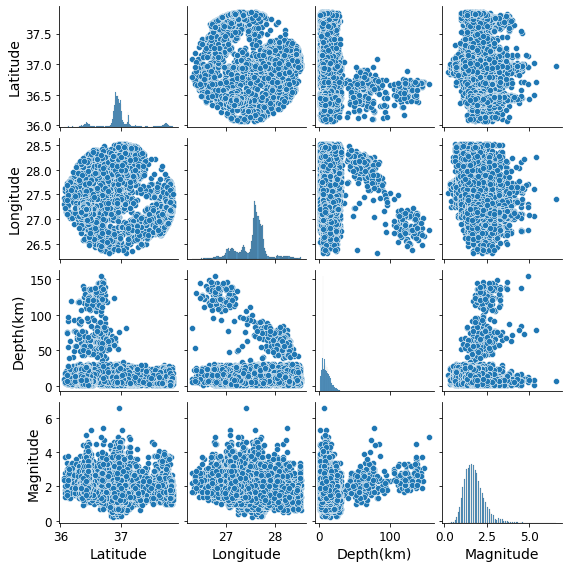

In [18]:
cols=['Latitude','Longitude','Depth(km)', 'Magnitude']
sns.pairplot(data[cols],height = 2)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

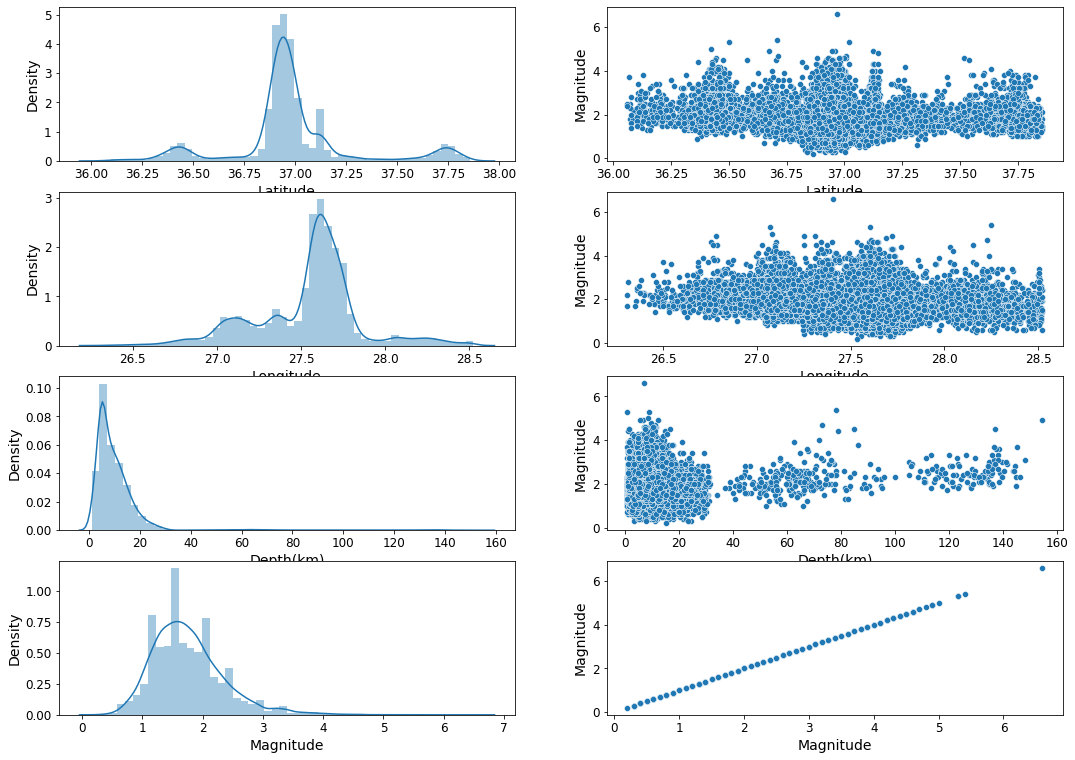

In [19]:
plt.figure(figsize=(18,30))
for idx, f in enumerate(['Latitude','Longitude','Depth(km)', 'Magnitude']):
    plt.subplot(9,2,2*idx+1)
    sns.distplot(data[f])
    plt.subplot(9,2,2*idx+2)
    sns.scatterplot(x=f,y='Magnitude',data =data2)

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


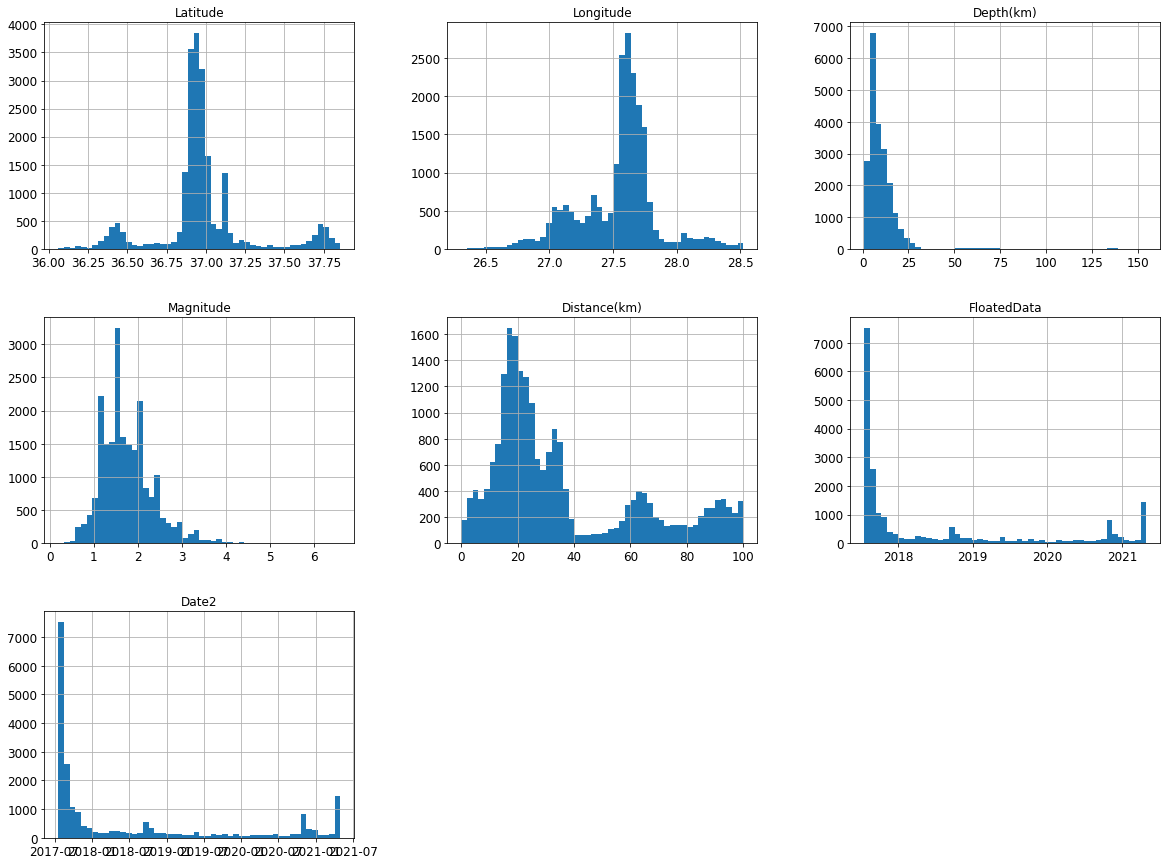

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
data2.hist(bins=50, figsize=(20,15))
plt.show()

array([[<AxesSubplot:xlabel='Latitude', ylabel='Latitude'>,
        <AxesSubplot:xlabel='Longitude', ylabel='Latitude'>,
        <AxesSubplot:xlabel='Depth(km)', ylabel='Latitude'>,
        <AxesSubplot:xlabel='Magnitude', ylabel='Latitude'>,
        <AxesSubplot:xlabel='Distance(km)', ylabel='Latitude'>,
        <AxesSubplot:xlabel='FloatedData', ylabel='Latitude'>],
       [<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>,
        <AxesSubplot:xlabel='Longitude', ylabel='Longitude'>,
        <AxesSubplot:xlabel='Depth(km)', ylabel='Longitude'>,
        <AxesSubplot:xlabel='Magnitude', ylabel='Longitude'>,
        <AxesSubplot:xlabel='Distance(km)', ylabel='Longitude'>,
        <AxesSubplot:xlabel='FloatedData', ylabel='Longitude'>],
       [<AxesSubplot:xlabel='Latitude', ylabel='Depth(km)'>,
        <AxesSubplot:xlabel='Longitude', ylabel='Depth(km)'>,
        <AxesSubplot:xlabel='Depth(km)', ylabel='Depth(km)'>,
        <AxesSubplot:xlabel='Magnitude', ylabel='Depth(km)'>,
     

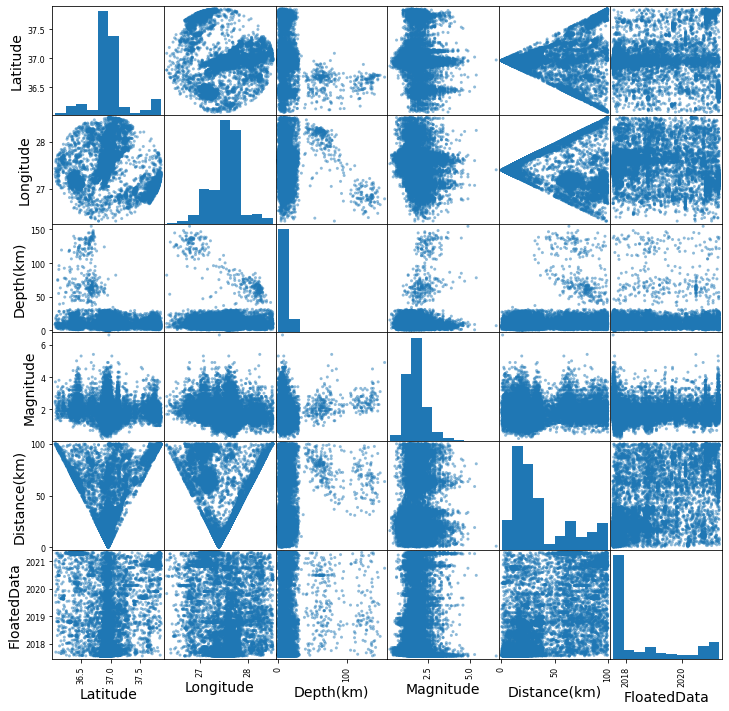

In [21]:
from pandas.plotting import scatter_matrix
scatter_matrix(data2, figsize=(12, 12))

Text(0.5, 1.0, 'Correlation between different fearures')

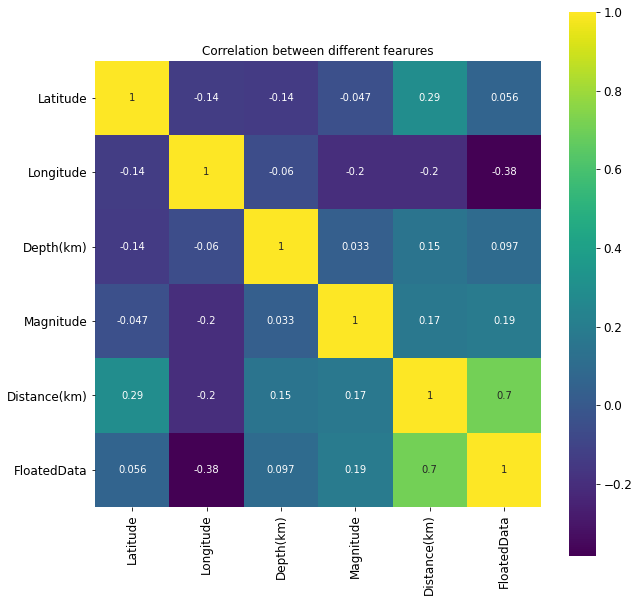

In [22]:
correlation = data2.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

In [23]:
cor=data2.corr()
cor

Latitude  Longitude  Depth(km)  Magnitude  Distance(km)  \
Latitude      1.000000  -0.135189  -0.141656  -0.047472      0.289734   
Longitude    -0.135189   1.000000  -0.059692  -0.204002     -0.200959   
Depth(km)    -0.141656  -0.059692   1.000000   0.032727      0.151793   
Magnitude    -0.047472  -0.204002   0.032727   1.000000      0.170710   
Distance(km)  0.289734  -0.200959   0.151793   0.170710      1.000000   
FloatedData   0.056106  -0.382938   0.096949   0.187457      0.703813   

              FloatedData  
Latitude         0.056106  
Longitude       -0.382938  
Depth(km)        0.096949  
Magnitude        0.187457  
Distance(km)     0.703813  
FloatedData      1.000000

**Silhouette latitude-longitude**

In [24]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [25]:
# selecting features
x = data2.iloc[:,[2,3]].values

In [26]:
# Elbow Method

score = []

for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=10)
    kmeans.fit(x)
    score.append(kmeans.inertia_)

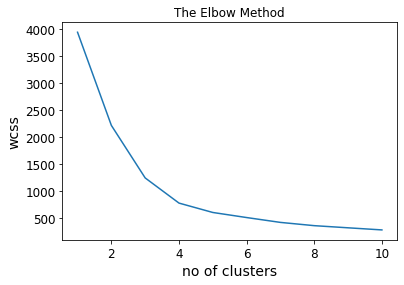

In [27]:
# plotting the score

plt.plot(range(1,11), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6633347738018126
For n_clusters = 3 The average silhouette_score is : 0.6549704825202716
For n_clusters = 4 The average silhouette_score is : 0.6512789639056386
For n_clusters = 5 The average silhouette_score is : 0.5422590521102789
For n_clusters = 6 The average silhouette_score is : 0.4971998147282028
For n_clusters = 7 The average silhouette_score is : 0.5048344086056981
For n_clusters = 8 The average silhouette_score is : 0.5139204166955285
For n_clusters = 9 The average silhouette_score is : 0.5122602093800659
For n_clusters = 10 The average silhouette_score is : 0.502852975585193


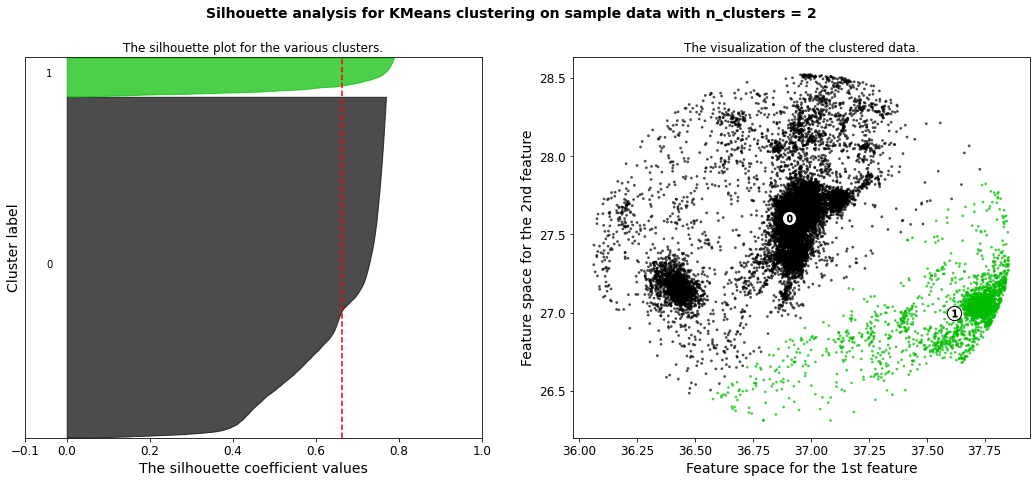

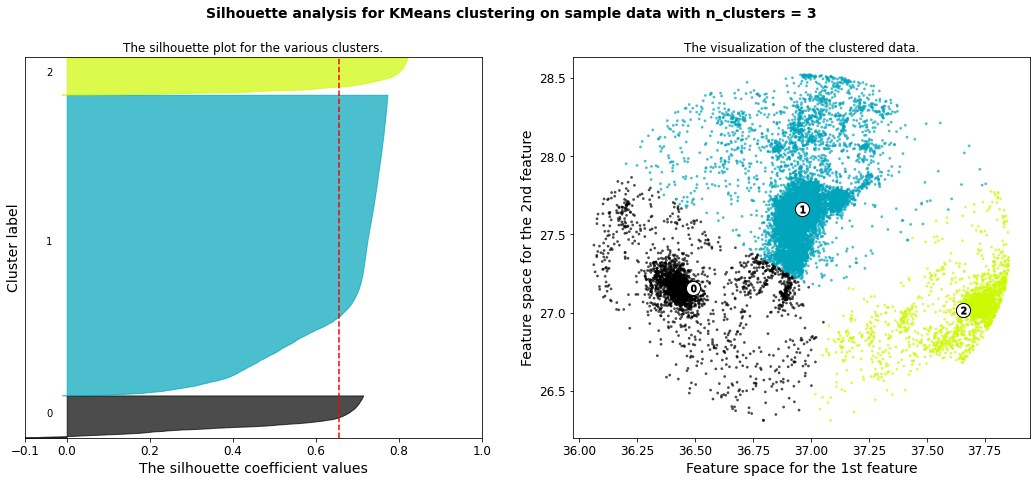

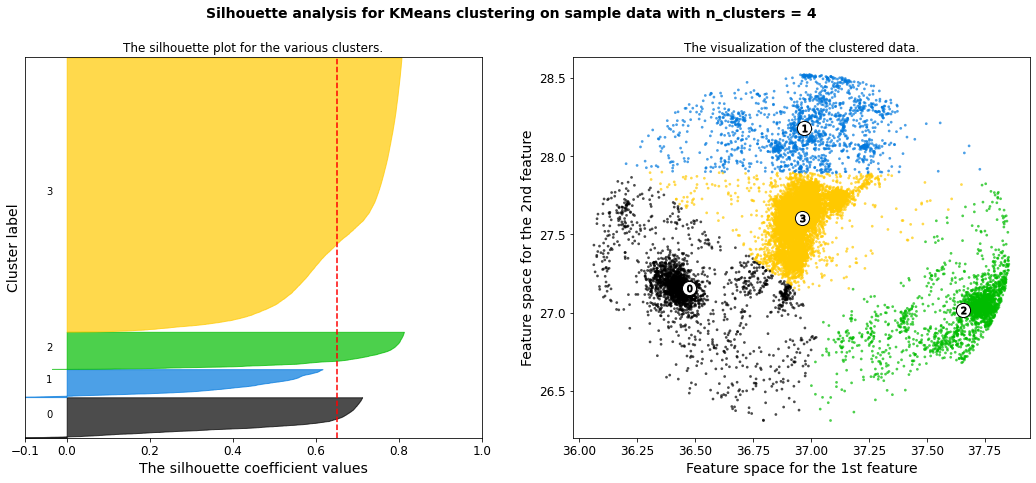

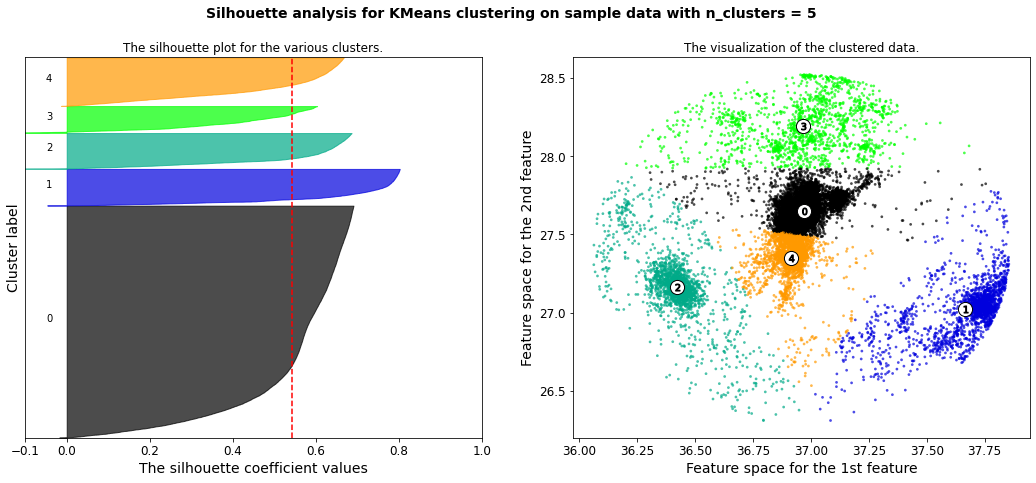

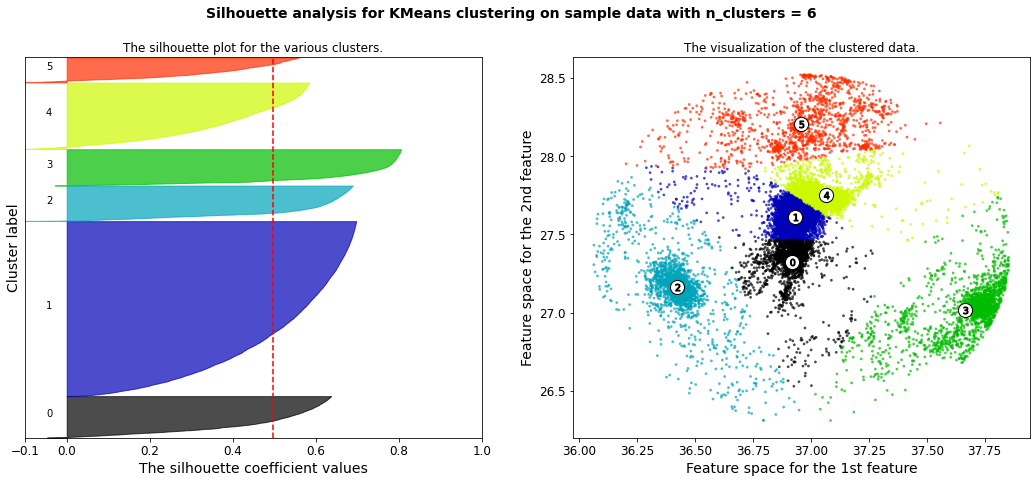

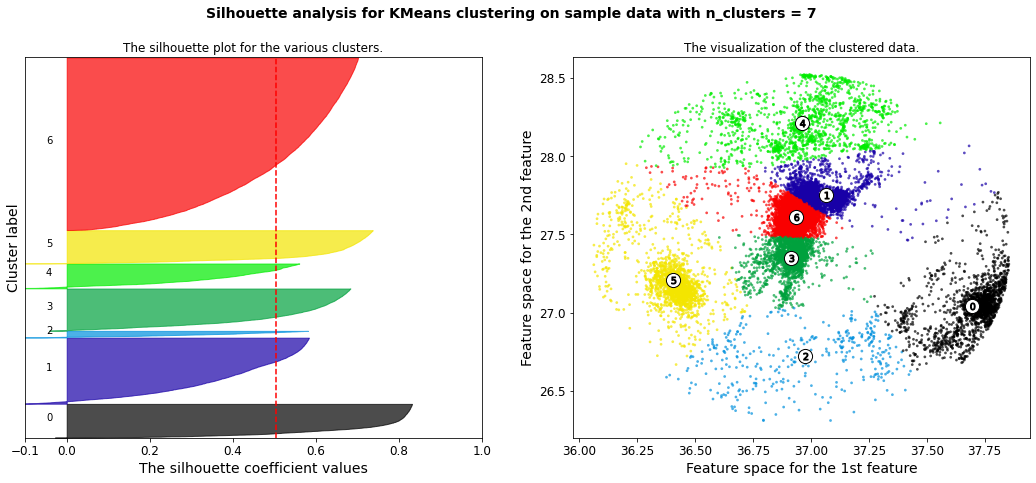

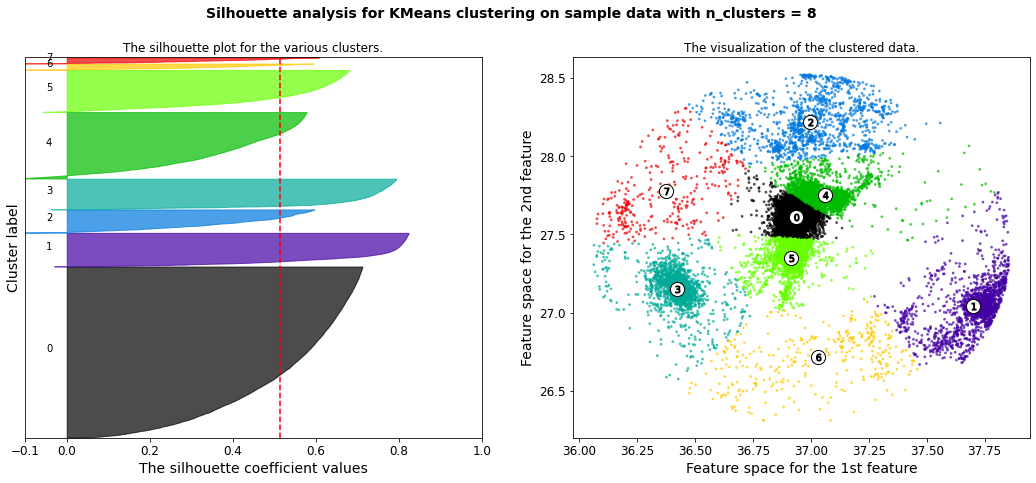

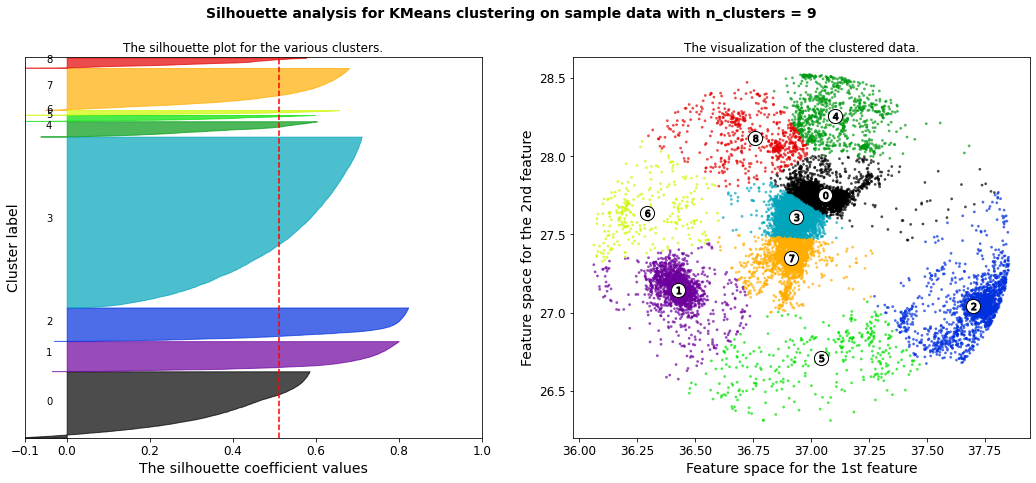

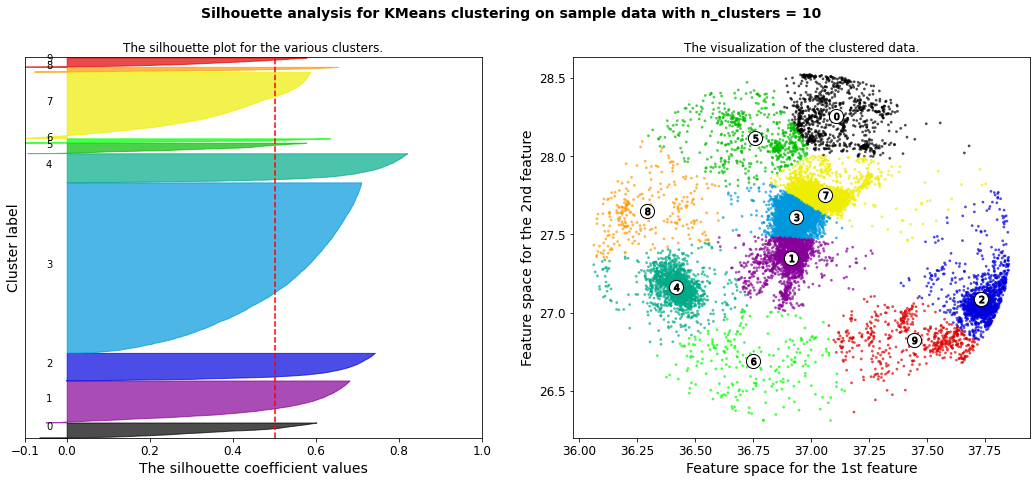

In [28]:
# Silhouette score

for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x[:, 0], x[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

**DBSCAN latitude-longitude**

In [29]:
x=data2.iloc[:,[2,3]].values

In [30]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [31]:
model=db.fit(x)

In [32]:
label=model.labels_

In [33]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 1


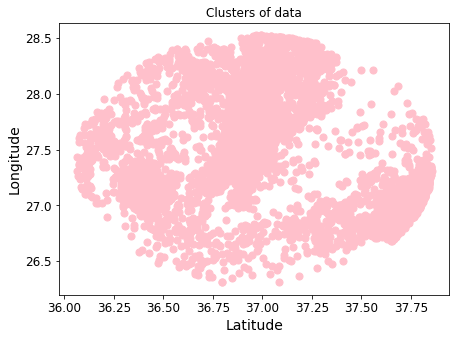

In [34]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clusters of data')
plt.show()

**Silhouette depth-magnitude**

In [35]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [36]:
data2.head()

Date         Time  Latitude  Longitude  Depth(km)  Magnitude  \
0  7/20/2017  03:28:22.81   37.5327    27.4825        5.4        1.8   
6  7/20/2017  22:10:00.82   36.9637    27.4223        5.4        2.6   
7  7/20/2017  22:31:09.66   36.9693    27.4057        7.1        6.6   
8  7/20/2017  22:34:15.33   36.9298    27.6018        5.5        3.7   
9  7/20/2017  22:34:40.17   36.9663    27.4163        5.4        3.7   

   Distance(km)  FloatedData      Date2  
0         63.98  2017.547945 2017-07-20  
6          2.03  2017.547945 2017-07-20  
7          1.15  2017.547945 2017-07-20  
8         18.29  2017.547945 2017-07-20  
9          1.61  2017.547945 2017-07-20

In [37]:
# selecting features
x = data2.iloc[:,[4,5]].values

In [38]:
# Elbow Method

score = []

for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=10)
    kmeans.fit(x)
    score.append(kmeans.inertia_)

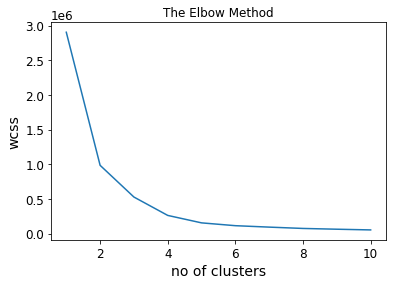

In [39]:
# plotting the score

plt.plot(range(1,11), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.9135338351560633
For n_clusters = 3 The average silhouette_score is : 0.6073673463905856
For n_clusters = 4 The average silhouette_score is : 0.6102849204619846
For n_clusters = 5 The average silhouette_score is : 0.5781278450088796
For n_clusters = 6 The average silhouette_score is : 0.5373887239168396
For n_clusters = 7 The average silhouette_score is : 0.5373413945183837
For n_clusters = 8 The average silhouette_score is : 0.5068666837579914
For n_clusters = 9 The average silhouette_score is : 0.4797342729166931
For n_clusters = 10 The average silhouette_score is : 0.47769975574823625


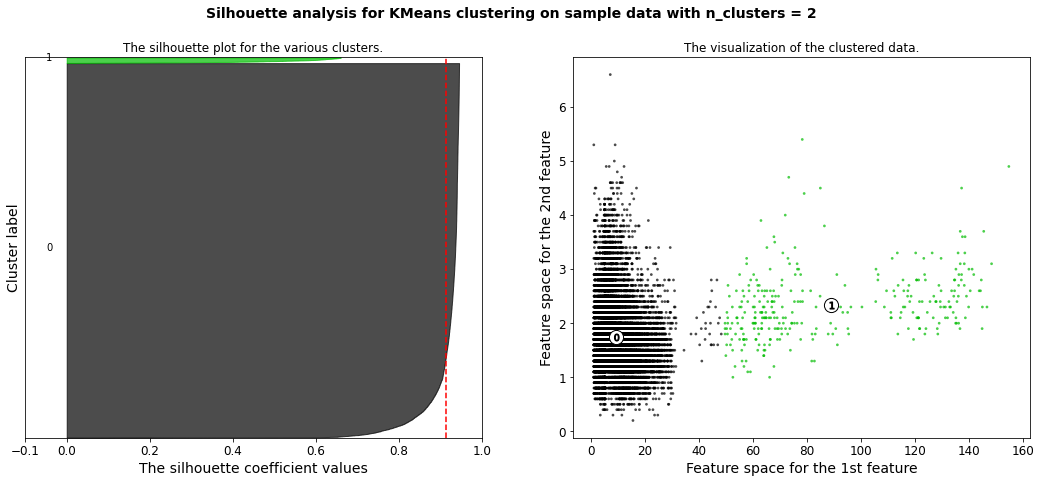

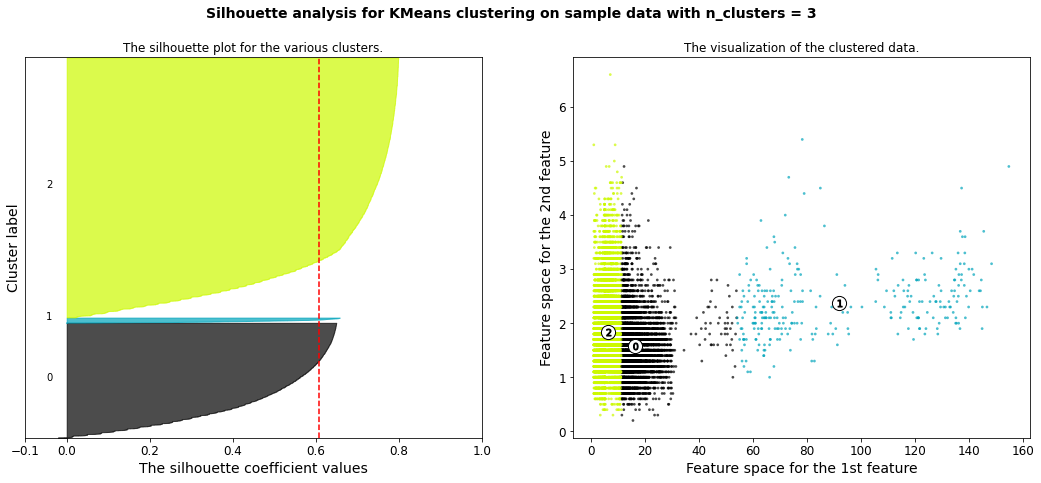

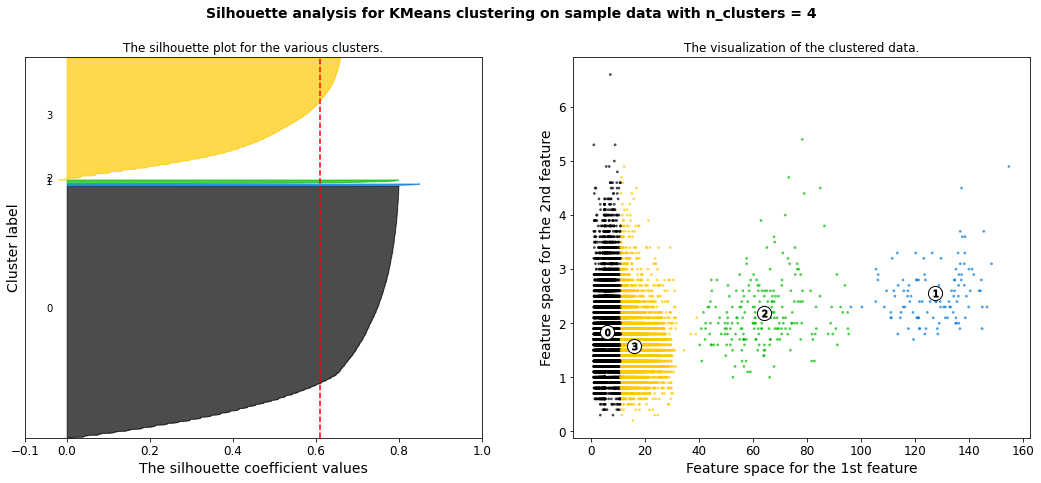

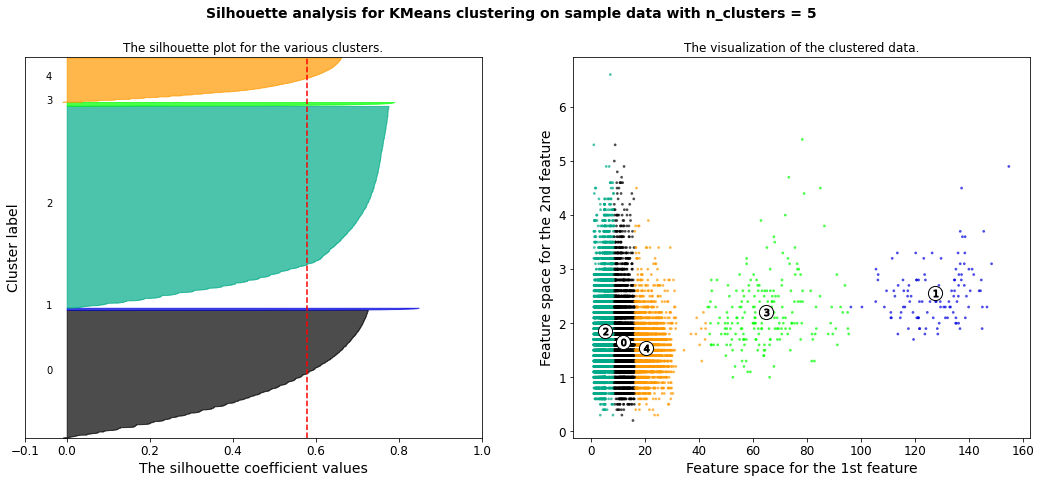

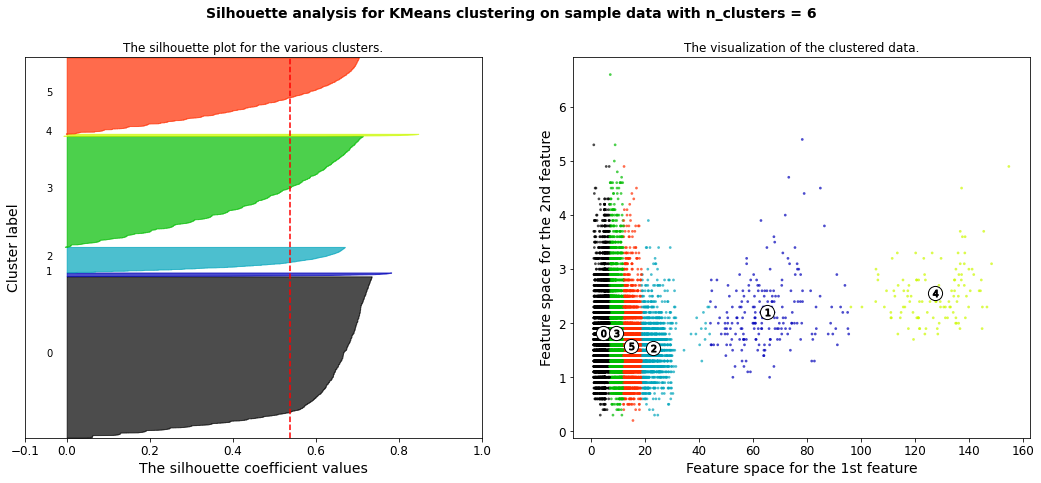

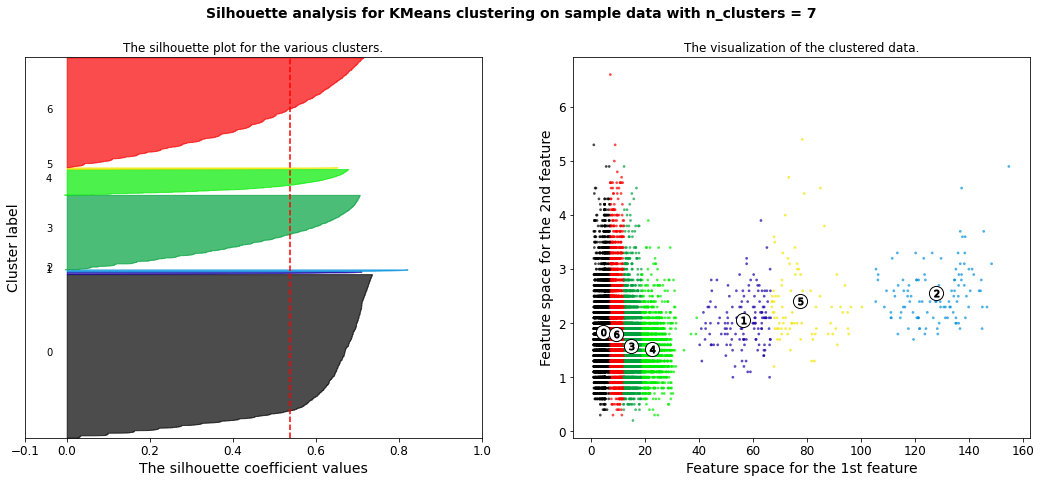

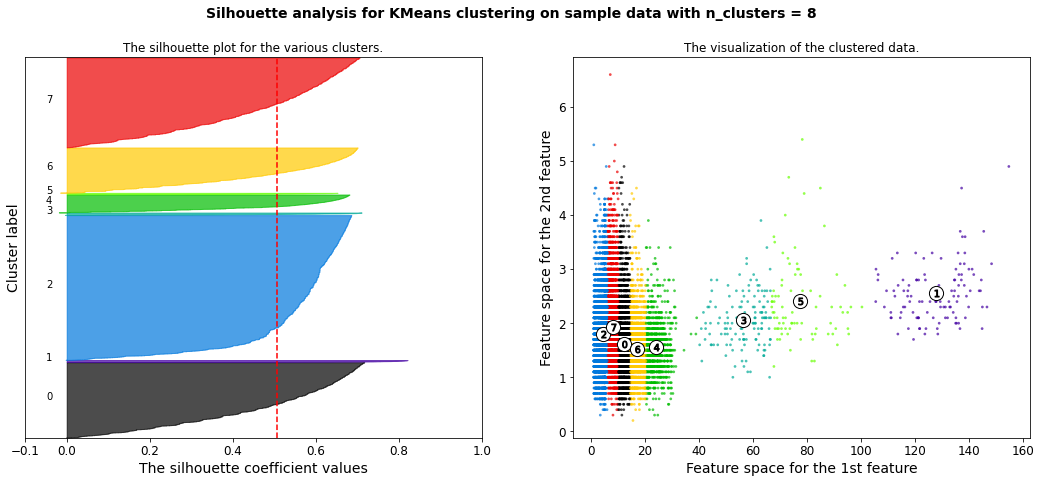

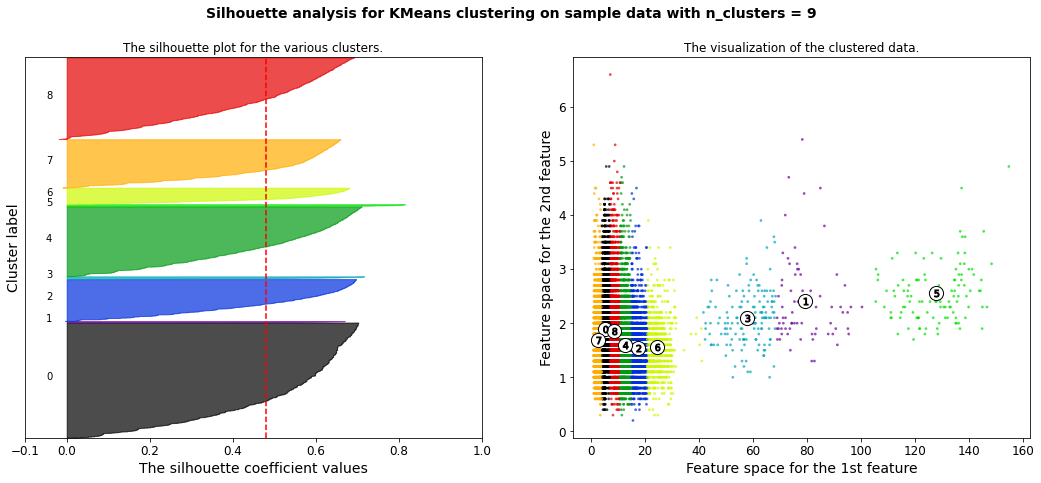

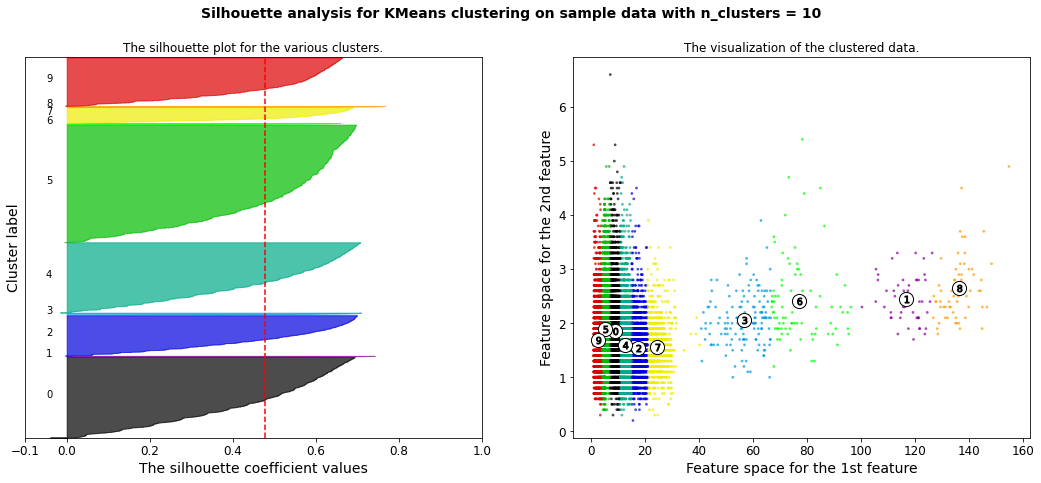

In [40]:
# Silhouette score

for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x[:, 0], x[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

**DBSCAN depth-magnitude**

In [41]:
data2.head()

Date         Time  Latitude  Longitude  Depth(km)  Magnitude  \
0  7/20/2017  03:28:22.81   37.5327    27.4825        5.4        1.8   
6  7/20/2017  22:10:00.82   36.9637    27.4223        5.4        2.6   
7  7/20/2017  22:31:09.66   36.9693    27.4057        7.1        6.6   
8  7/20/2017  22:34:15.33   36.9298    27.6018        5.5        3.7   
9  7/20/2017  22:34:40.17   36.9663    27.4163        5.4        3.7   

   Distance(km)  FloatedData      Date2  
0         63.98  2017.547945 2017-07-20  
6          2.03  2017.547945 2017-07-20  
7          1.15  2017.547945 2017-07-20  
8         18.29  2017.547945 2017-07-20  
9          1.61  2017.547945 2017-07-20

In [42]:
x=data2.iloc[:,[4,5]].values

In [43]:
x.shape

(21410, 2)

In [44]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [45]:
model=db.fit(x)

In [46]:
label=model.labels_

In [47]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 3


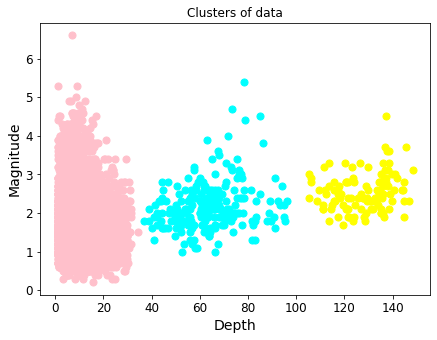

In [48]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')
plt.xlabel('Depth')
plt.ylabel('Magnitude')
plt.title('Clusters of data')
plt.show()

**3d Clustering**

In [49]:
# import the libraries
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [50]:
# input matrix for segmentation
x = data2[['Depth(km)','Magnitude','Latitude', 'Longitude']].values

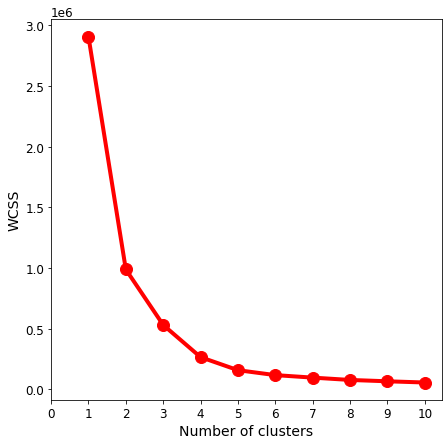

In [51]:
# find the optimal number of clusters using elbow method  -- >This is for 3 features = [age,anual income,spending score]

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [52]:
# finding the clusters based on input matrix "x"
model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='count'>

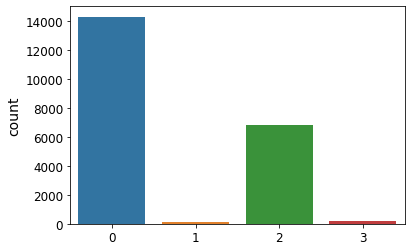

In [53]:
# countplot to check the number of clusters and number of customers in each cluster
sns.countplot(y_clusters)

In [54]:
print(x[y_clusters == 0,0][1])
print(x[y_clusters == 0,1][1])
print(x[y_clusters == 0,2][1])
print(x[y_clusters == 0,3][1])

5.4
2.6
36.9637
27.4223


In [55]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Latitude'),yaxis = dict(title  = 'Longitude'),zaxis = dict(title  = 'Depth'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model.labels_
trace = go.Scatter3d(x=x[:, 2], y=x[:, 3], z=-x[:, 0], mode='markers',marker=dict(color = labels, size= 1))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [56]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Latitude'),yaxis = dict(title  = 'Longitude'),zaxis = dict(title  = 'Magnitude'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model.labels_
trace = go.Scatter3d(x=x[:, 2], y=x[:, 3], z=x[:, 1], mode='markers',marker=dict(color = labels, size= 1))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

**3D Clustering - 2**

In [57]:
data2.head()

Date         Time  Latitude  Longitude  Depth(km)  Magnitude  \
0  7/20/2017  03:28:22.81   37.5327    27.4825        5.4        1.8   
6  7/20/2017  22:10:00.82   36.9637    27.4223        5.4        2.6   
7  7/20/2017  22:31:09.66   36.9693    27.4057        7.1        6.6   
8  7/20/2017  22:34:15.33   36.9298    27.6018        5.5        3.7   
9  7/20/2017  22:34:40.17   36.9663    27.4163        5.4        3.7   

   Distance(km)  FloatedData      Date2  
0         63.98  2017.547945 2017-07-20  
6          2.03  2017.547945 2017-07-20  
7          1.15  2017.547945 2017-07-20  
8         18.29  2017.547945 2017-07-20  
9          1.61  2017.547945 2017-07-20

In [58]:
import numpy as np
from sklearn import preprocessing

DF_ARRAY = np.array(data2.iloc[:,3:7])          # Getting only the numeric features from the dataset
DF_NORM  = preprocessing.normalize(DF_ARRAY) # Normalizing the data

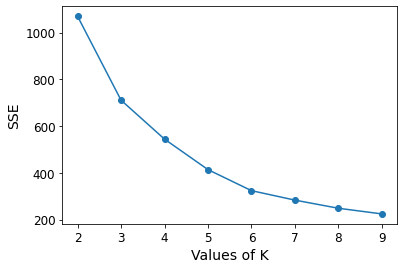

In [59]:
import matplotlib.pyplot as plt

# Amount of values to be tested for K
Ks = range(2, 10)

# List to hold on the metrics for each value of K
results = []

# Executing the loop
for K in Ks:
    
    model = KMeans(n_clusters = K)
    model.fit(DF_NORM)
    
    results.append(model.inertia_)

# Plotting the final result
plt.plot(Ks, results, 'o-')
plt.xlabel("Values of K")
plt.ylabel("SSE")
plt.show()

In [60]:
from sklearn.cluster import KMeans

# Creating our Model
kmeans = KMeans(n_clusters = 4)

# Training our model
kmeans.fit(DF_NORM)

# You can see the labels (clusters) assigned for each data point with the function labels_
kmeans.labels_

# Assigning the labels to the initial dataset
data2['cluster'] = kmeans.labels_

In [61]:
import plotly.graph_objects as go

PLOT = go.Figure()

for C in list(data2.cluster.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = data2[data2.cluster == C]['Latitude'],
                                y = data2[data2.cluster == C]['Longitude'],
                                z = -data2[data2.cluster == C]['Depth(km)'],
                                mode = 'markers', marker_size = 1,
                                name = 'Cluster ' + str(C)))


PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Latitude', titlefont_color = 'black'),
                                yaxis=dict(title = 'Longitude', titlefont_color = 'black'),
                                zaxis=dict(title = 'Depth(km)', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

In [62]:
import plotly.graph_objects as go

PLOT = go.Figure()

for C in list(data2.cluster.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = data2[data2.cluster == C]['Latitude'],
                                y = data2[data2.cluster == C]['Longitude'],
                                z = data2[data2.cluster == C]['Magnitude'],
                                mode = 'markers', marker_size = 1,
                                name = 'Cluster ' + str(C)))


PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Latitude', titlefont_color = 'black'),
                                yaxis=dict(title = 'Longitude', titlefont_color = 'black'),
                                zaxis=dict(title = 'Magnitude', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

In [63]:
data2.head()

Date         Time  Latitude  Longitude  Depth(km)  Magnitude  \
0  7/20/2017  03:28:22.81   37.5327    27.4825        5.4        1.8   
6  7/20/2017  22:10:00.82   36.9637    27.4223        5.4        2.6   
7  7/20/2017  22:31:09.66   36.9693    27.4057        7.1        6.6   
8  7/20/2017  22:34:15.33   36.9298    27.6018        5.5        3.7   
9  7/20/2017  22:34:40.17   36.9663    27.4163        5.4        3.7   

   Distance(km)  FloatedData      Date2  cluster  
0         63.98  2017.547945 2017-07-20        0  
6          2.03  2017.547945 2017-07-20        2  
7          1.15  2017.547945 2017-07-20        2  
8         18.29  2017.547945 2017-07-20        3  
9          1.61  2017.547945 2017-07-20        2

Standardising data
